## Открываю данные из CSV файла Elections

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Elections.csv',encoding ="cp1251")
df = df.drop(df.columns[[0]],axis = 1) # Лишний индекс

In [4]:
df.head()

,№ Коммисии,№ УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,% Амосова,Беглов Александр Дмитриевич,% Беглова,Тихонова Надежда Геннадьевна,% Тихоновой
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,18.39,345,57.69,120,20.07
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,11.94,326,73.42,46,10.36
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,25.92,332,55.52,96,16.05
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,20.81,171,53.11,71,22.05
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,27.35,266,53.09,82,16.37


## 1 - Группирую данные по ТИК чтобы найти явку

In [5]:
comms = df.groupby("№ Коммисии").sum()
comms[:2]

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,% Амосова,Беглов Александр Дмитриевич,% Беглова,Тихонова Надежда Геннадьевна,% Тихоновой
№ Коммисии,,,,,,,,,,,,,,,,,
Территориальная избирательная комиссия №1,105510,83250,31626,1592,50032,1590,31437,1220,31807,0,0,6206,1129.91,19818,3725.32,5783,1029.15
Территориальная избирательная комиссия №10,93291,80300,27411,1059,51830,1057,27375,681,27751,0,0,4104,702.10,19296,3041.88,4351,737.82


### Считаю явку и сортирую по ней DataFrame

In [6]:
comms["Явка"] = (comms['Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования'] 
                    + comms['Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования'])/comms['Число избирателей, внесенных в список избирателей на момент окончания голосования']

In [7]:
comms_appearance = comms.sort_values(by=['Явка'],ascending = False)
comms_appearance.head()

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,% Амосова,Беглов Александр Дмитриевич,% Беглова,Тихонова Надежда Геннадьевна,% Тихоновой,Явка
№ Коммисии,,,,,,,,,,,,,,,,,,
Территориальная избирательная комиссия №18,94434,67559,47349,1314,18896,1314,46600,1076,46838,0,0,5753,701.72,36632,4116.17,4453,548.85,0.515312
Территориальная избирательная комиссия №15,35191,27750,13329,752,13669,752,13327,394,13685,0,0,1718,368.79,9780,2111.35,2187,435.71,0.400131
Территориальная избирательная комиссия №13,47955,40450,17519,1506,21424,1506,17506,556,18456,1,0,2597,504.17,13274,2585.74,2585,502.91,0.396726
Территориальная избирательная комиссия №19,143014,123947,51433,2644,69869,2644,51223,579,53288,1,0,8379,1327.97,37091,5049.62,7818,1209.05,0.378124
Территориальная избирательная комиссия №8,84723,65630,29626,909,35095,909,29596,1110,29395,0,0,4156,592.63,20635,3092.75,4604,642.91,0.360410


## 2 - Ищу участок с наибольшим результатом Амосова

In [8]:
df[df['Число действительных избирательных бюллетеней']>100].loc[df['% Амосова'].idxmax()]

№ Коммисии                                                                                             Территориальная избирательная комиссия №17
№ УИК                                                                                                                                    УИК №567
Число избирателей, внесенных в список избирателей на момент окончания голосования                                                            2206
Число избирательных бюллетеней, полученных участковой избирательной комиссией                                                                2000
Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования                                           635
Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования                                             8
Число погашенных избирательных бюллетеней                                                                                   

## 3 - ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [9]:
df["Явка"] = (df['Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования'] 
                    + df['Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования'])/df['Число избирателей, внесенных в список избирателей на момент окончания голосования']

### Посчитав явку, нахожу в каждой коммисии участки с максимальной и минимальной явкой + считаю разность

In [10]:
max_min_appearance = df.groupby("№ Коммисии")['Явка'].agg(['max','min'])
max_min_appearance['$\Delta$'] = max_min_appearance['max'] - max_min_appearance['min']
max_min_appearance.head()

,max,min,$\Delta$
№ Коммисии,,,
Территориальная избирательная комиссия №1,0.996923,0.226659,0.770264
Территориальная избирательная комиссия №10,0.723299,0.167637,0.555662
Территориальная избирательная комиссия №11,0.995565,0.184118,0.811447
Территориальная избирательная комиссия №12,0.522881,0.186142,0.336739
Территориальная избирательная комиссия №13,1.000000,0.254902,0.745098


In [11]:
max_min_appearance.loc[max_min_appearance['$\Delta$'].idxmax()]

max         1.00000
min         0.17958
$\Delta$    0.82042
Name: Территориальная избирательная комиссия №17, dtype: float64

## 4 - Дисперсия по явке для каждого ТИК

In [12]:
df.groupby("№ Коммисии")['Явка'].agg(['var']).sort_values(by=['var'],ascending = False)

,var
№ Коммисии,
Территориальная избирательная комиссия №23,0.058670
Территориальная избирательная комиссия №30,0.052078
Территориальная избирательная комиссия №2,0.046018
Территориальная избирательная комиссия №22,0.045004
Территориальная избирательная комиссия №15,0.041609
Территориальная избирательная комиссия №13,0.039350
Территориальная избирательная комиссия №28,0.039207
Территориальная избирательная комиссия №17,0.032932
Территориальная избирательная комиссия №21,0.031019


## 5 - Таблицы кандидатов
### В левом столбце процент, а в правом количество УИК

In [13]:
df['% Амосова'].astype(int).value_counts(sort = False)

0       5
1       4
2       4
3      12
4       9
5      24
6      31
7      35
8      65
9      77
10     84
11    109
12    124
13    146
14    138
15    159
16    149
17    144
18    111
19     99
20     82
21     79
22     58
23     56
24     50
25     33
26     45
27     22
28     19
29     19
30     11
31      5
32      6
33      1
34      2
35      3
41      1
Name: % Амосова, dtype: int64

In [14]:
df['% Беглова'].astype(int).value_counts(sort = False)

30    1
31    1
32    1
33    1
37    2
     ..
92    2
93    4
94    2
95    1
97    2
Name: % Беглова, Length: 64, dtype: int64

In [15]:
df['% Тихоновой'].astype(int).value_counts(sort = False)

0       3
1       4
2       8
3      10
4      11
5      25
6      14
7      29
8      37
9      49
10     45
11     69
12     75
13     87
14    129
15    174
16    211
17    197
18    186
19    170
20    141
21    114
22     79
23     46
24     21
25     19
26     12
27     12
28      6
29      6
30      6
31      6
32      2
33      4
34      5
35      2
36      2
37      1
39      1
40      1
43      1
47      1
Name: % Тихоновой, dtype: int64

## 6 - отношение - явка на УИК → результат кандидата

In [16]:
import matplotlib.pyplot as plt
import numpy as np

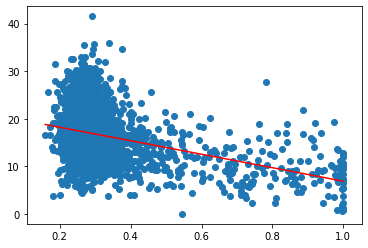

In [17]:
x = df['Явка']
y = df['% Амосова']
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'r')

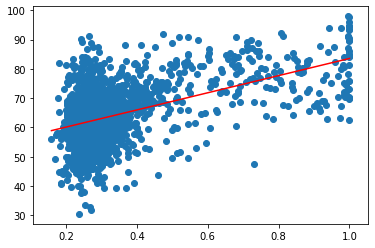

In [21]:
x = df['Явка']
y = df['% Беглова']
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'r')

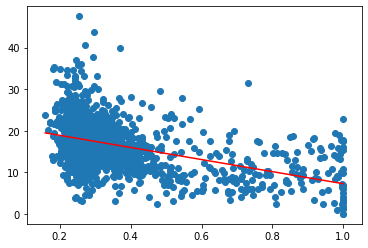

In [19]:
x = df['Явка']
y = df['% Тихоновой']
plt.scatter(x,y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'r')